### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Load Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('Online_Retail.xlsx')

Check dataset details

In [5]:
df.shape

(541909, 8)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Remove missing values from the dataset

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(406829, 8)

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Explore & Visualize Dataset

Number of Unique customers

In [11]:
len(df.CustomerID.unique())

4372

Geograhic information

In [12]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

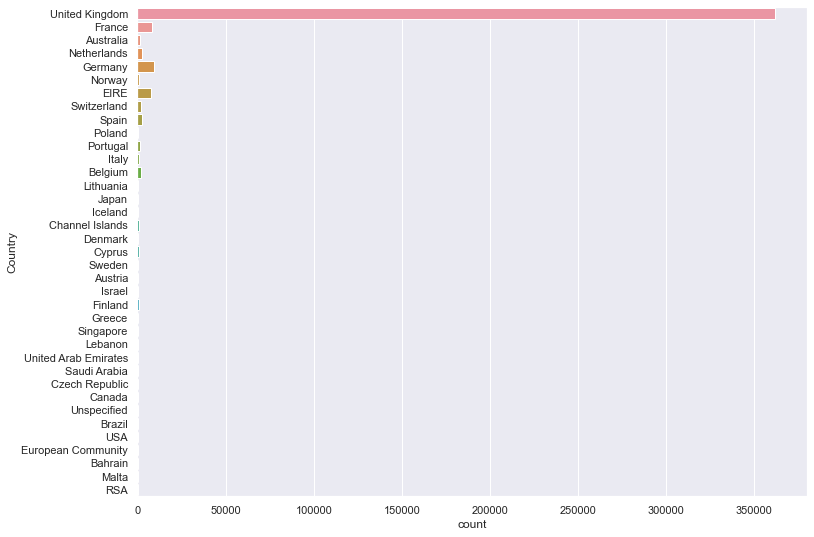

In [14]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(y='Country', data=df)

Lets remove Non-UK records as enough Geographic details about other countries/region is not available.

In [15]:
df = df[df.Country.isin(['United Kingdom'])]

In [16]:
df.shape

(361878, 8)

In [17]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

Number of Unique Products

In [18]:
len(df.StockCode.unique())

3661

Invoice Date Range

In [19]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

### Remove Invoices for 'Returns'

Number of Returned invoices

In [20]:
df.InvoiceNo.str.startswith('C').sum()

7533

Remove these invoices from the dataset

In [21]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [22]:
df.shape

(354345, 8)

### Build a Customer Dataset

In [23]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

In [24]:
cust_df.columns

Index(['CustomerID'], dtype='object')

### Recency of Purchase

In [25]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days   ##Subtracting from the last date.

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [27]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})      ## To Find the no. of customers with their latest buy.

In [28]:
recency_df.shape

(3921, 2)

In [29]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [30]:
cust_df.shape

(3921, 2)

In [31]:
cust_df

,CustomerID,Recency
0,17850.0,372
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25
...,...,...
3916,15471.0,2
3917,13436.0,1
3918,15520.0,1
3919,13298.0,1


### Frequency of Invoices

In [32]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'count'})

In [33]:
frequency_df.shape

(3921, 2)

In [34]:
frequency_df

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
...,...,...
3916,18280.0,10
3917,18281.0,7
3918,18282.0,12
3919,18283.0,756


In [35]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [36]:
cust_df.shape

(3921, 3)

In [37]:
cust_df

,CustomerID,Recency,InvoiceNo
0,17850.0,372,297
1,13047.0,31,172
2,13748.0,95,28
3,15100.0,333,3
4,15291.0,25,103
...,...,...,...
3916,15471.0,2,77
3917,13436.0,1,12
3918,15520.0,1,18
3919,13298.0,1,2


### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [38]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [39]:
monetary_df =  df.groupby('CustomerID', as_index=False).agg({'Sales':'sum'})

In [40]:
monetary_df

,CustomerID,Sales
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3916,18280.0,180.60
3917,18281.0,80.82
3918,18282.0,178.05
3919,18283.0,2094.88


In [41]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [42]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales
0,17850.0,372,297,5391.21
1,13047.0,31,172,3237.54
2,13748.0,95,28,948.25
3,15100.0,333,3,876.00
4,15291.0,25,103,4668.30
...,...,...,...,...
3916,15471.0,2,77,469.48
3917,13436.0,1,12,196.89
3918,15520.0,1,18,343.50
3919,13298.0,1,2,360.00


Here we are ready with the RFM dataset for the 3921 customers.

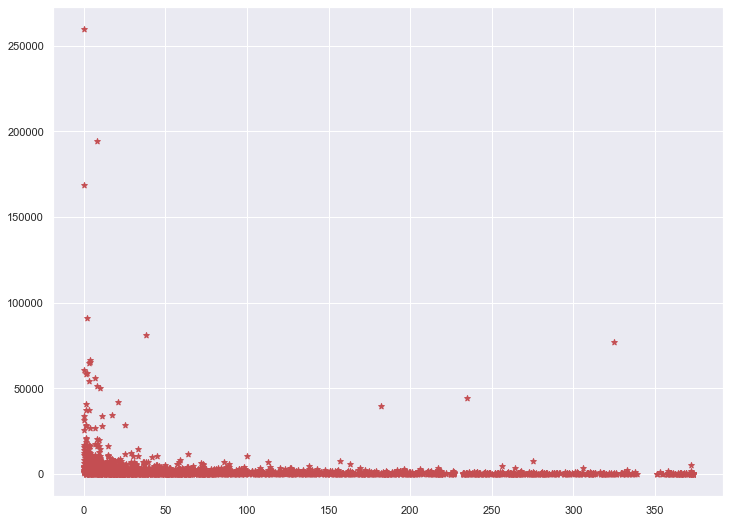

In [43]:
plt.scatter(cust_df.Recency,cust_df.Sales,marker='*',c='R')
plt.show()

It can be visualized that the customers that are recent are not always spend alot, But this can also be seen that the most spending customers are also Recent buyers.

In [44]:
## Let's Find out who are one time customer and who are returning customers.

In [45]:
cust_df['one-timer'] = cust_df.InvoiceNo

In [46]:
cust_df.head()

,CustomerID,Recency,InvoiceNo,Sales,one-timer
0,17850.0,372,297,5391.21,297
1,13047.0,31,172,3237.54,172
2,13748.0,95,28,948.25,28
3,15100.0,333,3,876.00,3
4,15291.0,25,103,4668.30,103


In [47]:
cust_df['one-timer'].value_counts()

6      73
1      71
10     70
9      70
5      67
       ..
538     1
524     1
516     1
512     1
720     1
Name: one-timer, Length: 443, dtype: int64

In [48]:
cust_df['one-timer'] = cust_df['one-timer'].map({1:'One-Time'})

In [49]:
cust_df['one-timer'].fillna('More than Once',inplace=True)

In [50]:
cust_df['Avg_Sales_per_invoice'] = cust_df.Sales/cust_df.InvoiceNo

In [51]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice
0,17850.0,372,297,5391.21,More than Once,18.152222
1,13047.0,31,172,3237.54,More than Once,18.822907
2,13748.0,95,28,948.25,More than Once,33.866071
3,15100.0,333,3,876.00,More than Once,292.000000
4,15291.0,25,103,4668.30,More than Once,45.323301
...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,More than Once,6.097143
3917,13436.0,1,12,196.89,More than Once,16.407500
3918,15520.0,1,18,343.50,More than Once,19.083333
3919,13298.0,1,2,360.00,More than Once,180.000000


In [52]:
cust_df[cust_df.Avg_Sales_per_invoice == cust_df.Avg_Sales_per_invoice.max()]

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice
1002,12346.0,325,1,77183.6,One-Time,77183.6


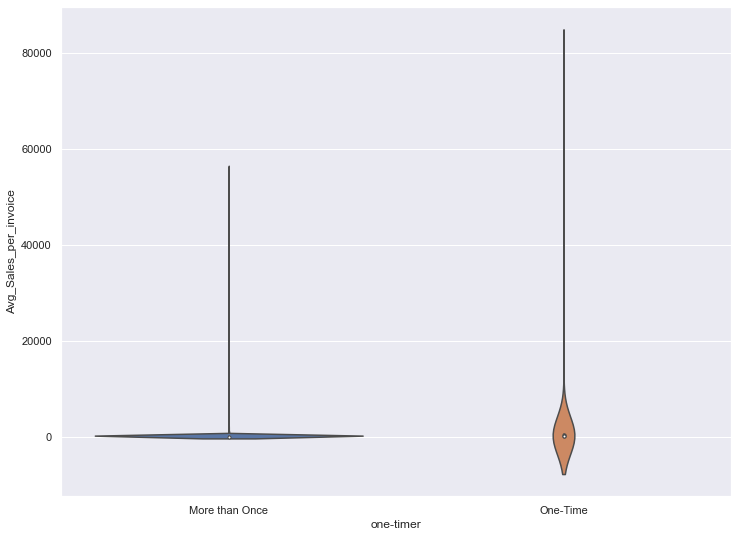

In [53]:
sns.violinplot(cust_df['one-timer'],cust_df.Avg_Sales_per_invoice)
plt.show()

In [54]:
rfm = cust_df.copy()

In [55]:
from scipy.stats import zscore

In [56]:
cust_df['one-timer'].value_counts()

More than Once    3850
One-Time            71
Name: one-timer, dtype: int64

In [57]:
rfm['one-timer'] = rfm['one-timer'].map({'One-Time':0,'More than Once':1})

In [58]:
rfm.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [59]:
pd.qcut(rfm['Recency'], [0,.25,.5,.75, 1],labels=['Highly_Active','Frequent','Temp_Idle','Inactive'])

0            Inactive
1            Frequent
2           Temp_Idle
3            Inactive
4            Frequent
            ...      
3916    Highly_Active
3917    Highly_Active
3918    Highly_Active
3919    Highly_Active
3920    Highly_Active
Name: Recency, Length: 3921, dtype: category
Categories (4, object): [Highly_Active < Frequent < Temp_Idle < Inactive]

In [60]:
rfm['Activity'] = pd.qcut(rfm['Recency'], [0,.25,.5,.75, 1],labels=['Highly_Active','Frequent','Temp_Idle','Inactive'])

In [61]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity
0,17850.0,372,297,5391.21,1,18.152222,Inactive
1,13047.0,31,172,3237.54,1,18.822907,Frequent
2,13748.0,95,28,948.25,1,33.866071,Temp_Idle
3,15100.0,333,3,876.00,1,292.000000,Inactive
4,15291.0,25,103,4668.30,1,45.323301,Frequent
...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,1,6.097143,Highly_Active
3917,13436.0,1,12,196.89,1,16.407500,Highly_Active
3918,15520.0,1,18,343.50,1,19.083333,Highly_Active
3919,13298.0,1,2,360.00,1,180.000000,Highly_Active


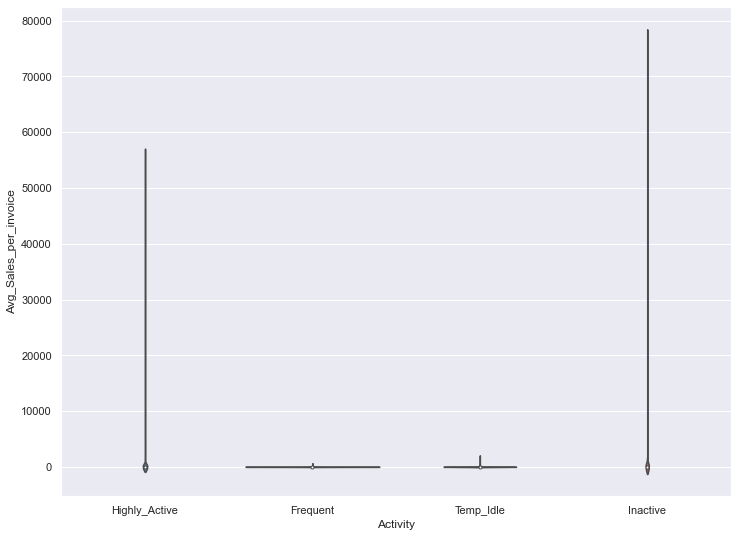

In [62]:
sns.violinplot(rfm.Activity,rfm.Avg_Sales_per_invoice)

In [63]:
rfm.Activity.value_counts()

Highly_Active    1004
Inactive          979
Temp_Idle         969
Frequent          969
Name: Activity, dtype: int64

The more focus should be on the Temp_Idle customers. They are the potential customers that we are losing.

In [64]:
rfm['R'] = pd.qcut(rfm['Recency'], [0,.2,.4,.6,.8, 1],labels=[5,4,3,2,1])

In [65]:
rfm['F'] = pd.qcut(rfm['InvoiceNo'], [0,.2,.4,.6,.8, 1],labels=[1,2,3,4,5])

In [66]:
rfm['M'] = pd.qcut(rfm['Sales'], [0,.2,.4,.6,.8, 1],labels=[1,2,3,4,5])

In [67]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity,R,F,M
0,17850.0,372,297,5391.21,1,18.152222,Inactive,1,5,5
1,13047.0,31,172,3237.54,1,18.822907,Frequent,4,5,5
2,13748.0,95,28,948.25,1,33.866071,Temp_Idle,2,2,4
3,15100.0,333,3,876.00,1,292.000000,Inactive,1,1,3
4,15291.0,25,103,4668.30,1,45.323301,Frequent,4,4,5
...,...,...,...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,1,6.097143,Highly_Active,5,4,3
3917,13436.0,1,12,196.89,1,16.407500,Highly_Active,5,1,1
3918,15520.0,1,18,343.50,1,19.083333,Highly_Active,5,2,2
3919,13298.0,1,2,360.00,1,180.000000,Highly_Active,5,1,2


In [68]:
rfm['One_timer'] = rfm['one-timer'].map({0:'One-time',1:'More than one'})

In [69]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity,R,F,M,One_timer
0,17850.0,372,297,5391.21,1,18.152222,Inactive,1,5,5,More than one
1,13047.0,31,172,3237.54,1,18.822907,Frequent,4,5,5,More than one
2,13748.0,95,28,948.25,1,33.866071,Temp_Idle,2,2,4,More than one
3,15100.0,333,3,876.00,1,292.000000,Inactive,1,1,3,More than one
4,15291.0,25,103,4668.30,1,45.323301,Frequent,4,4,5,More than one
...,...,...,...,...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,1,6.097143,Highly_Active,5,4,3,More than one
3917,13436.0,1,12,196.89,1,16.407500,Highly_Active,5,1,1,More than one
3918,15520.0,1,18,343.50,1,19.083333,Highly_Active,5,2,2,More than one
3919,13298.0,1,2,360.00,1,180.000000,Highly_Active,5,1,2,More than one


In [70]:
rfm['Score'] = rfm.R.astype('int64')+rfm.F.astype('int64')+rfm.M.astype('int64')

In [71]:
rfm['Score'].value_counts()

6     354
7     342
5     338
9     336
8     335
10    316
12    300
11    295
15    283
13    280
14    270
4     239
3     233
Name: Score, dtype: int64

## Score distribution : 3-6 : Bronze ; 6-9 : Silver; 9-12 : Gold; 12-15 : Diamond

The Main focus should be on the customers that are in Silver category, as they are potential customers which could be shifted to gold category.

In [72]:
rfm.Score.describe()

count    3921.000000
mean        8.986738
std         3.581176
min         3.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        15.000000
Name: Score, dtype: float64

In [73]:
rfm['Cust_type'] = pd.qcut(rfm.Score,[0,0.25,0.5,0.75,1],labels=['Bronze','Silver','Gold','Diamond'])

In [74]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity,R,F,M,One_timer,Score,Cust_type
0,17850.0,372,297,5391.21,1,18.152222,Inactive,1,5,5,More than one,11,Gold
1,13047.0,31,172,3237.54,1,18.822907,Frequent,4,5,5,More than one,14,Diamond
2,13748.0,95,28,948.25,1,33.866071,Temp_Idle,2,2,4,More than one,8,Silver
3,15100.0,333,3,876.00,1,292.000000,Inactive,1,1,3,More than one,5,Bronze
4,15291.0,25,103,4668.30,1,45.323301,Frequent,4,4,5,More than one,13,Diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,1,6.097143,Highly_Active,5,4,3,More than one,12,Gold
3917,13436.0,1,12,196.89,1,16.407500,Highly_Active,5,1,1,More than one,7,Silver
3918,15520.0,1,18,343.50,1,19.083333,Highly_Active,5,2,2,More than one,9,Silver
3919,13298.0,1,2,360.00,1,180.000000,Highly_Active,5,1,2,More than one,8,Silver


## Thank-You

In [75]:
## Applying K-means clustering on RFM variables

### Preprocess Data

rfm_data = rfm[['Recency','InvoiceNo','Sales']]
rfm_data.head()

,Recency,InvoiceNo,Sales
0,372,297,5391.21
1,31,172,3237.54
2,95,28,948.25
3,333,3,876.00
4,25,103,4668.30


In [76]:
#### Feature correlations

rfm_data.corr()

,Recency,InvoiceNo,Sales
Recency,1.000000,-0.212067,-0.129449
InvoiceNo,-0.212067,1.000000,0.327936
Sales,-0.129449,0.327936,1.000000


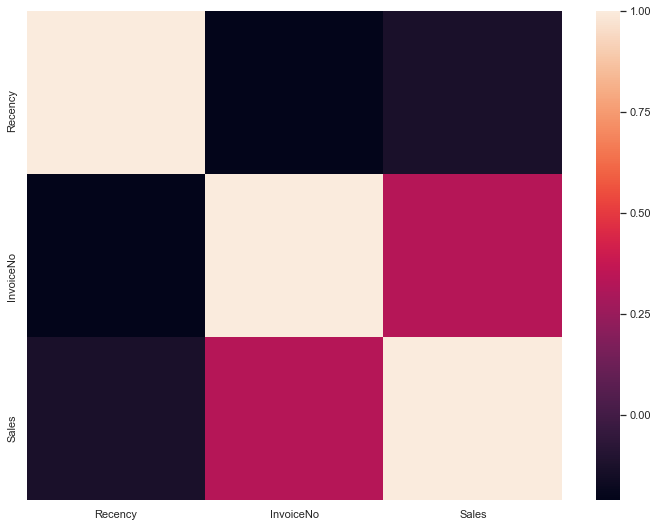

In [77]:
sns.heatmap(rfm_data.corr())

On one hand, we have a negative correlation between:
- Recency and Frequency
- Recency and Monetary

On the other hand, the correlation between **Monetary and Frequency** is positive comparing to negative ones but still not that strong. 
#### Visualize feature distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the three features present in the RFM data. 


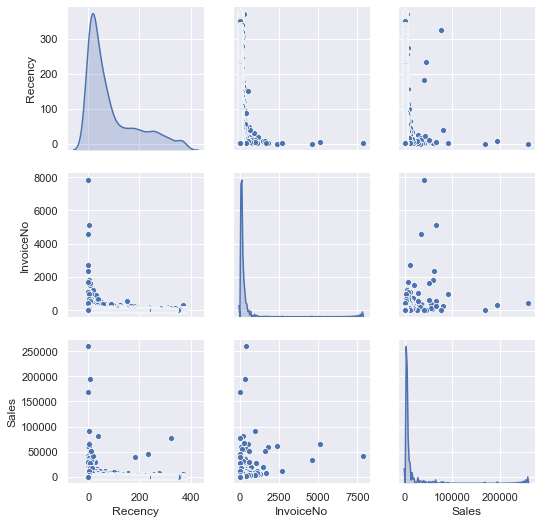

In [78]:
import seaborn as sns
sns.pairplot(rfm_data,diag_kind='kde')

We can notice that we have a **skewed distribution** of the 3 variables and there exist **outliers**.

This indicates how normalization is required to make the data features normally distributed as **clustering** algorithms **require** them to be **normally distributed**.

#### Data Normalization

In [80]:
#log transformation
rfm_r_log = np.log(rfm_data['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_data['InvoiceNo'])
rfm_m_log = np.log(rfm_data['Sales']+0.1)

In [81]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})

In [82]:
log_data.head()

,Monetary,Recency,Frequency
0,8.592544,5.919163,5.693732
1,8.082600,3.437208,5.147494
2,6.854724,4.554929,3.332205
3,6.775480,5.808443,1.098612
4,8.448572,3.222868,4.634729


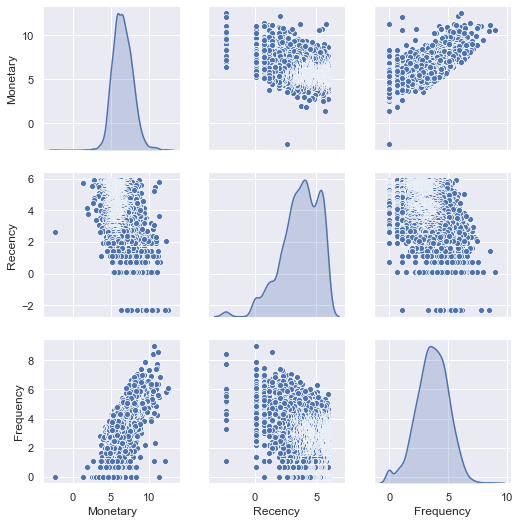

In [83]:
# Produce a scatter matrix for each pair of features in the data
sns.pairplot(log_data,diag_kind='kde');

The distributions of Frequency and Monetary are better, more normalized, but it's not the case with Recency Distribution, which is improved but not as much. 

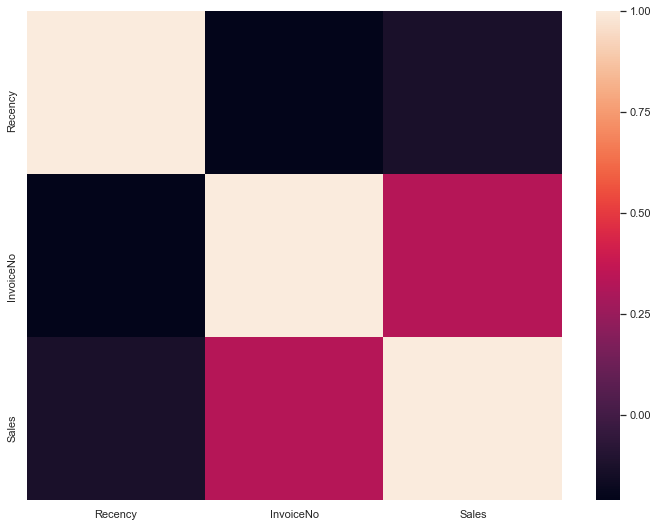

In [84]:
sns.heatmap(rfm_data.corr())

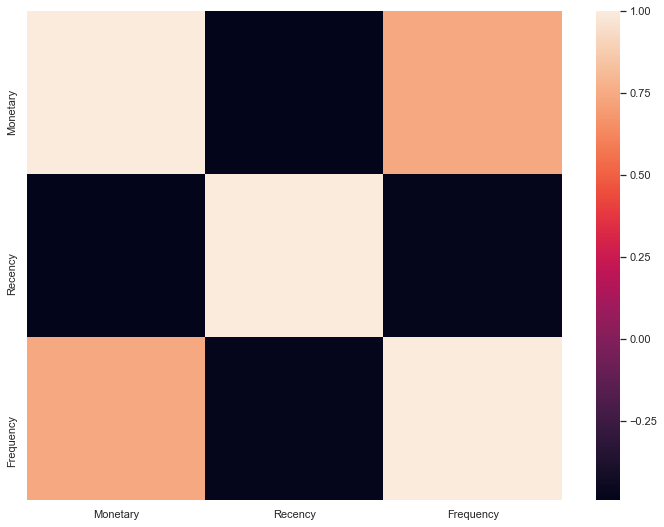

In [85]:
sns.heatmap(log_data.corr())

In [86]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.491248,0.748270
Recency,-0.491248,1.000000,-0.478848
Frequency,0.748270,-0.478848,1.000000


Now, Monetary and Frequency are more strongly correlated.

### K-means Implementation

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The [elbow](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_elbow_method) method can be used to determine the number of clusters as well.

**Note:** K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called ***k-means++***.

In [87]:
X=log_data

In [88]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,22229.774680
1,2,12012.425155
2,3,9228.316626
3,4,7723.432429
4,5,6561.948757
5,6,5903.788726
6,7,5299.742758
7,8,4872.307366
8,9,4548.069389
9,10,4267.169992


In [89]:
errors = clusters_df['cluster_errors']

for i in range(8):
    print(errors[i+1]-errors[i])

-10217.34952566354
-2784.1085282114254
-1504.8841969793048
-1161.4836720008307
-658.1600315845471
-604.04596744638
-427.4353924783936
-324.2379770814041


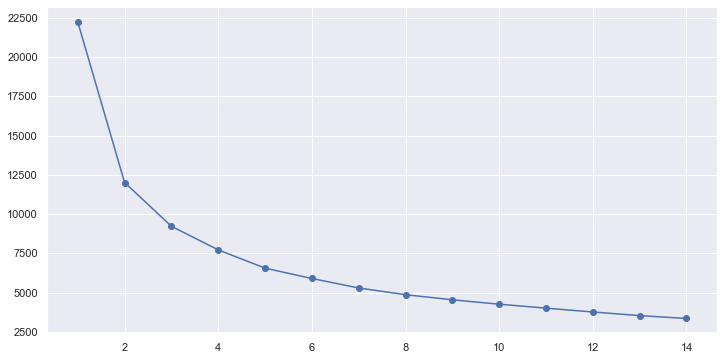

In [90]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [91]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[5.81058105 4.58288221 2.86832468]
 [7.54375623 2.54724631 4.7493727 ]]


In [92]:
colnames = ["Monetary", "Recency","Frequency"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [93]:
X_df.head()

,Monetary,Recency,Frequency,group
0,8.592544,5.919163,5.693732,1
1,8.082600,3.437208,5.147494,1
2,6.854724,4.554929,3.332205,0
3,6.775480,5.808443,1.098612,0
4,8.448572,3.222868,4.634729,1


In [95]:
X_df.index=rfm.CustomerID

In [97]:
X_df.head()

,Monetary,Recency,Frequency,group
CustomerID,,,,
17850.0,8.592544,5.919163,5.693732,1
13047.0,8.082600,3.437208,5.147494,1
13748.0,6.854724,4.554929,3.332205,0
15100.0,6.775480,5.808443,1.098612,0
15291.0,8.448572,3.222868,4.634729,1


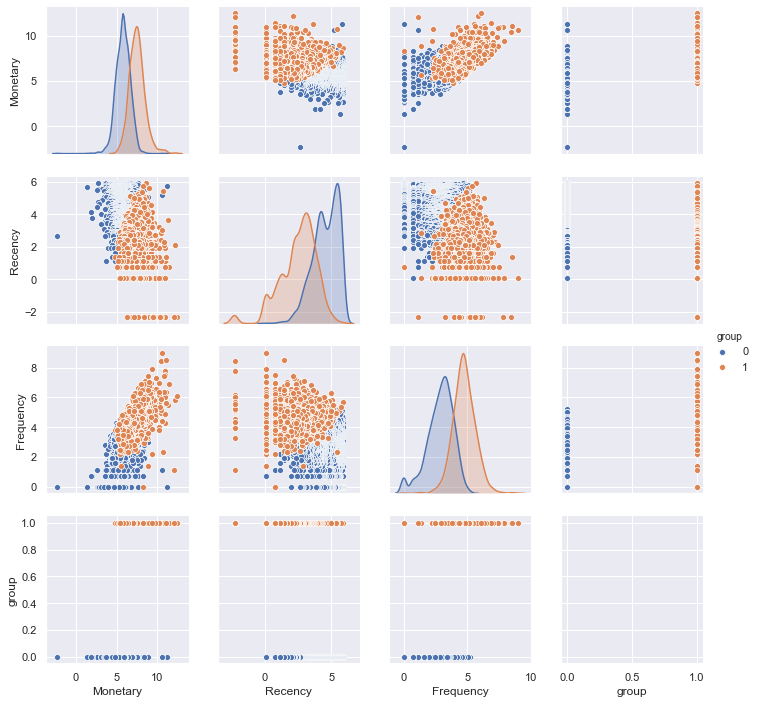

In [98]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0D8C810C8>,
      dtype=object)

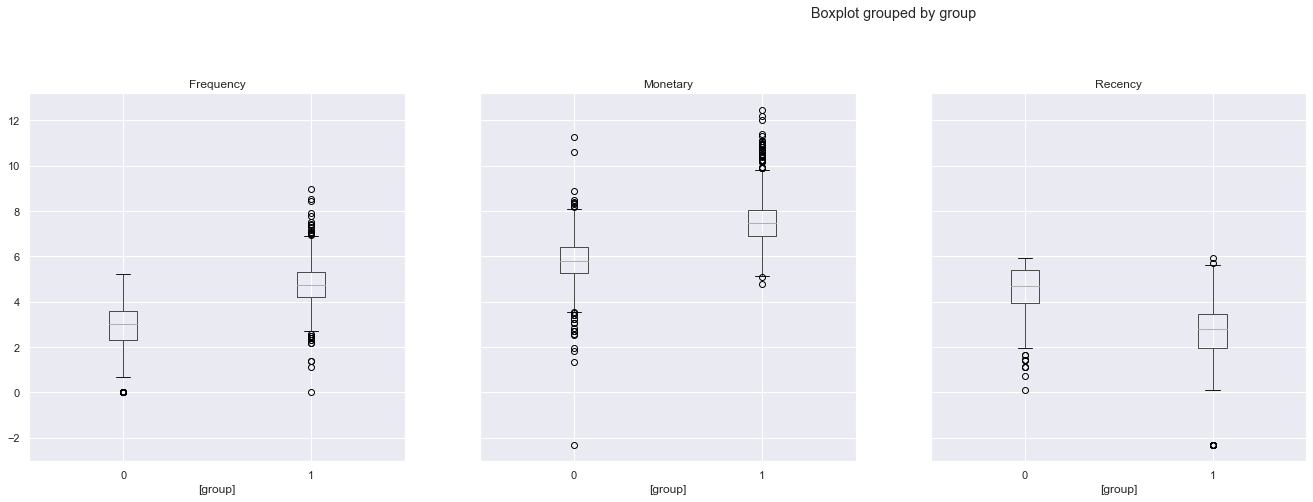

In [99]:
X_df.boxplot(by = 'group',layout=(2,4), figsize=(30, 15))

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3939767929978671


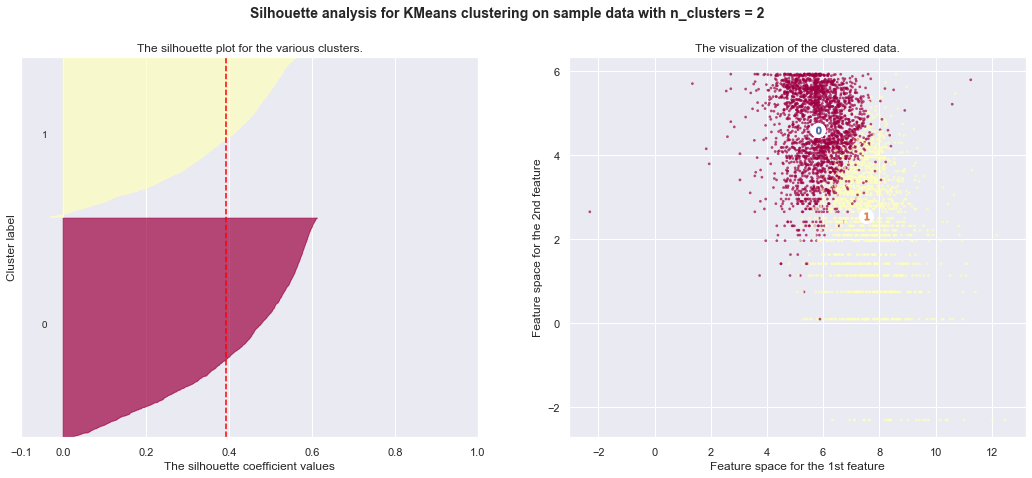

For n_clusters = 3 The average silhouette_score is : 0.3109830304783074


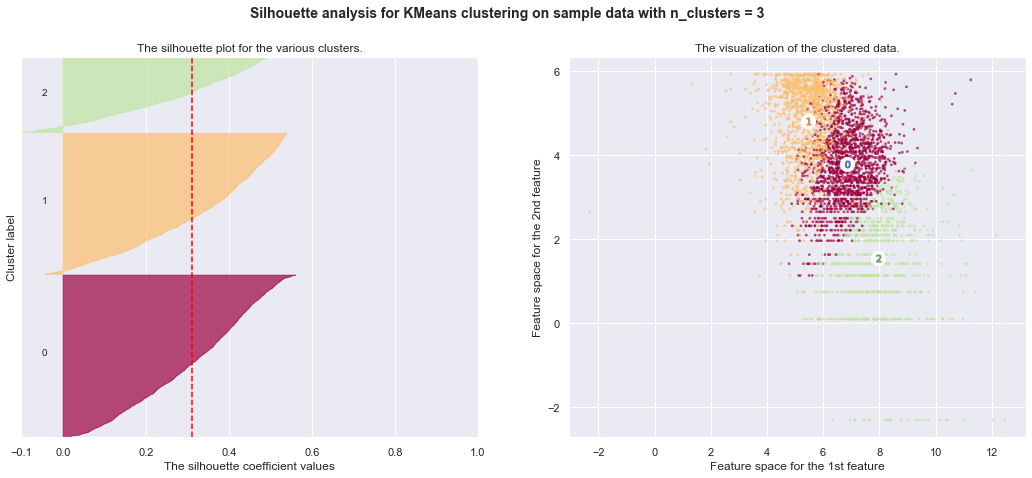

For n_clusters = 4 The average silhouette_score is : 0.30624382379146714


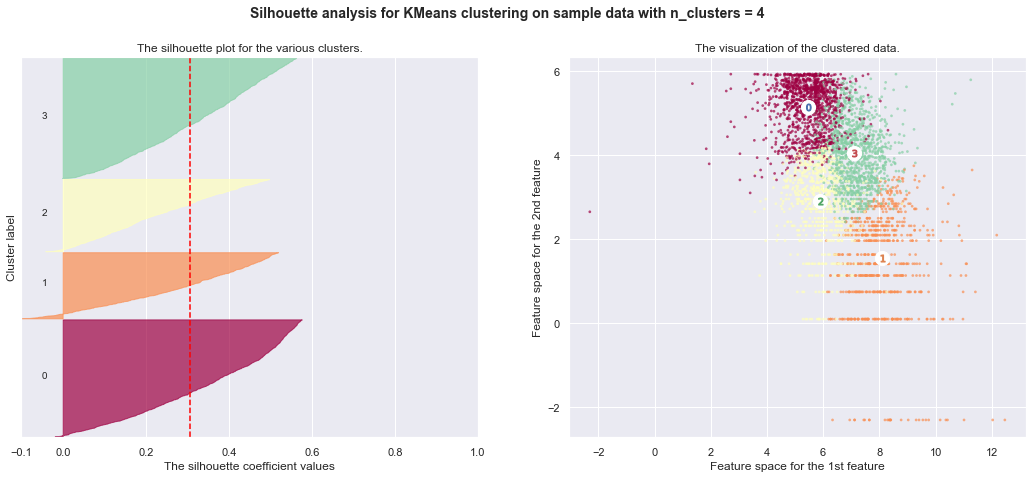

For n_clusters = 5 The average silhouette_score is : 0.28256360172273237


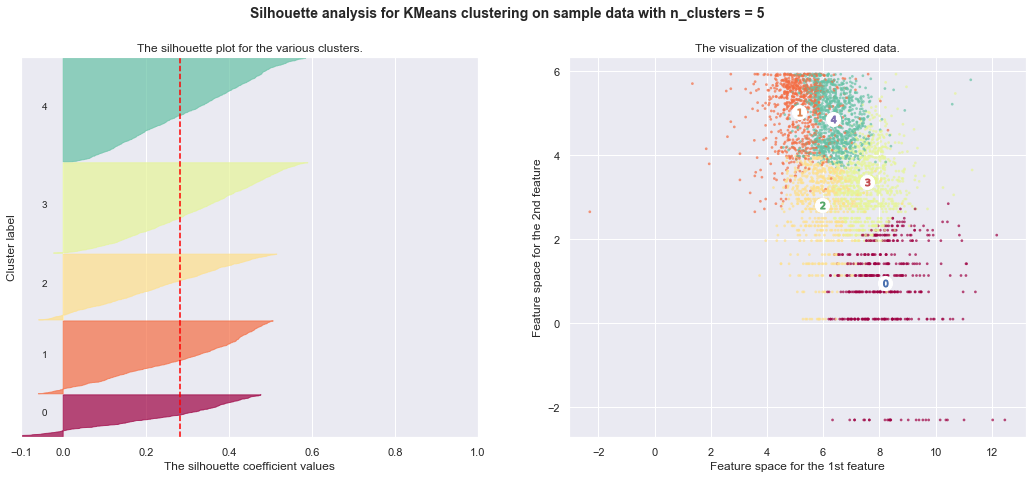

For n_clusters = 6 The average silhouette_score is : 0.26186066789730544


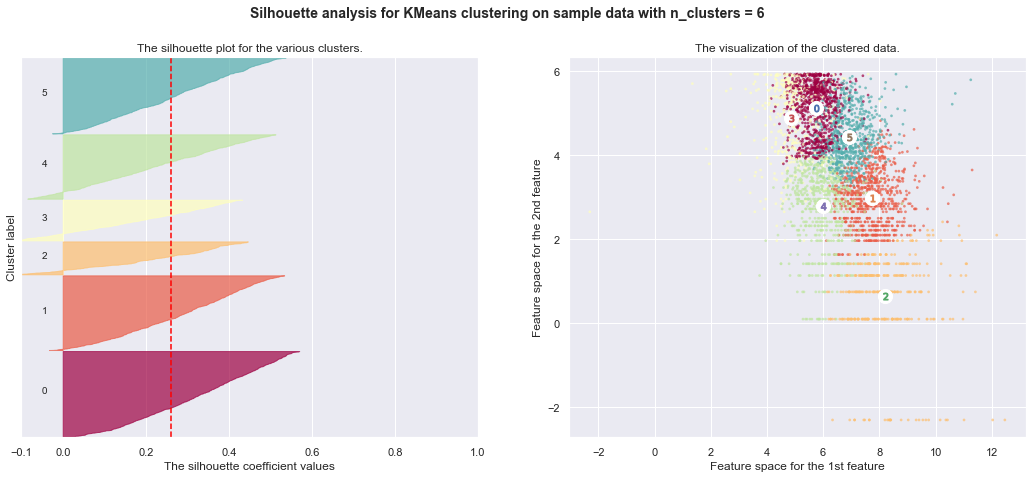

For n_clusters = 7 The average silhouette_score is : 0.2696135392340862


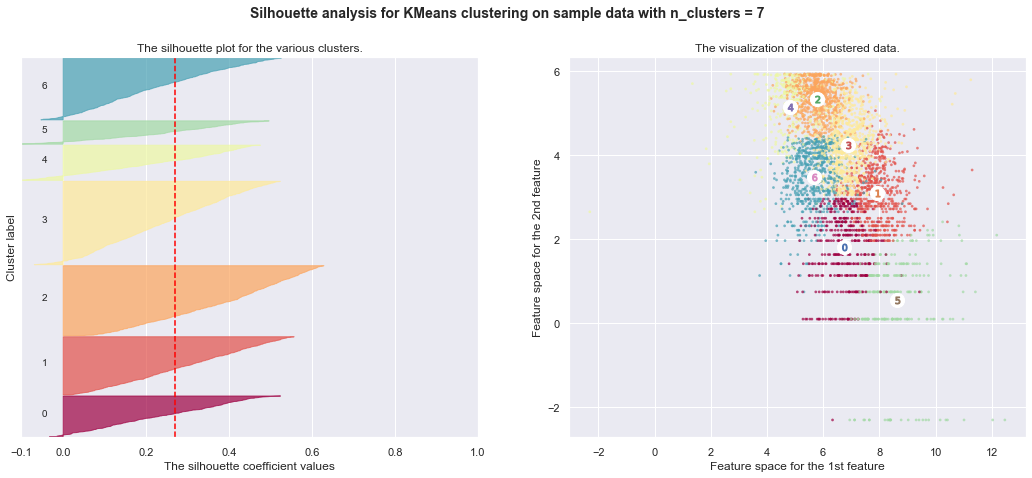

For n_clusters = 8 The average silhouette_score is : 0.2628640101680392


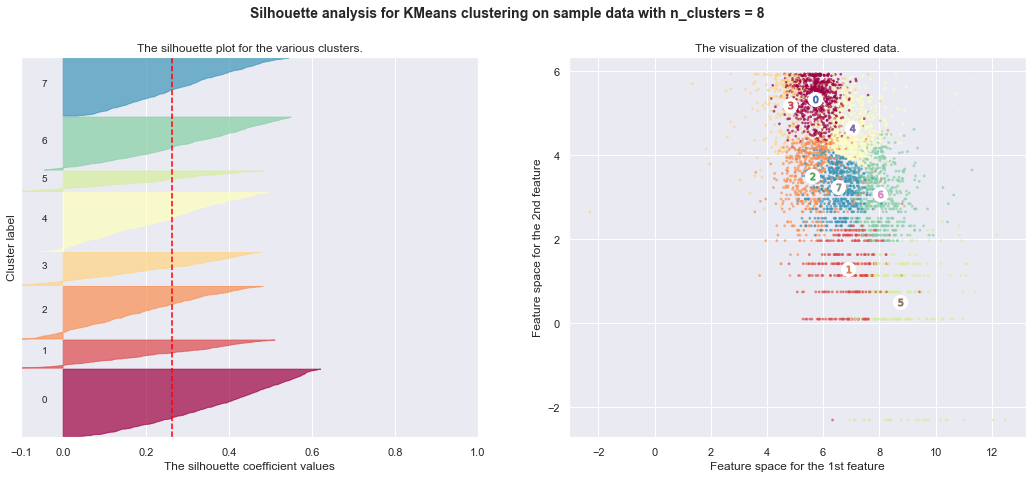

For n_clusters = 9 The average silhouette_score is : 0.2580911851210192


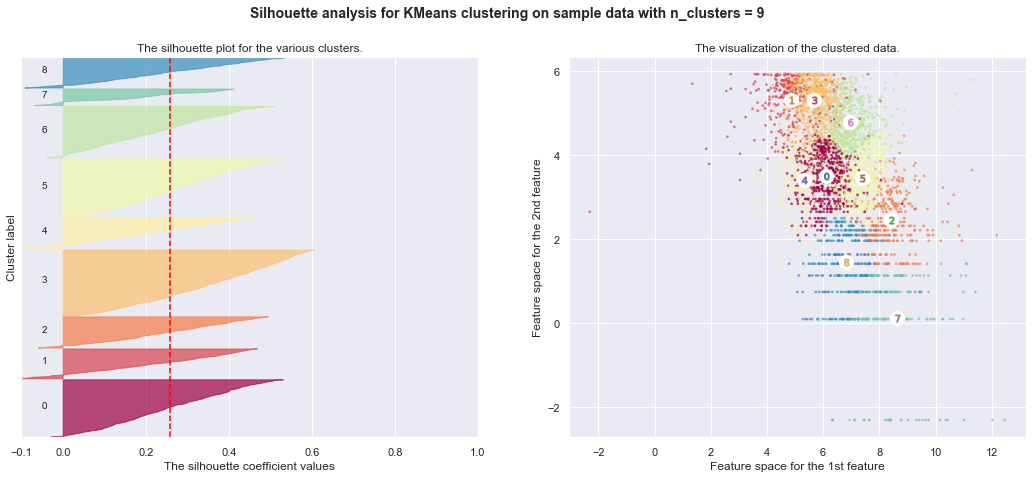

For n_clusters = 10 The average silhouette_score is : 0.25626507700543166


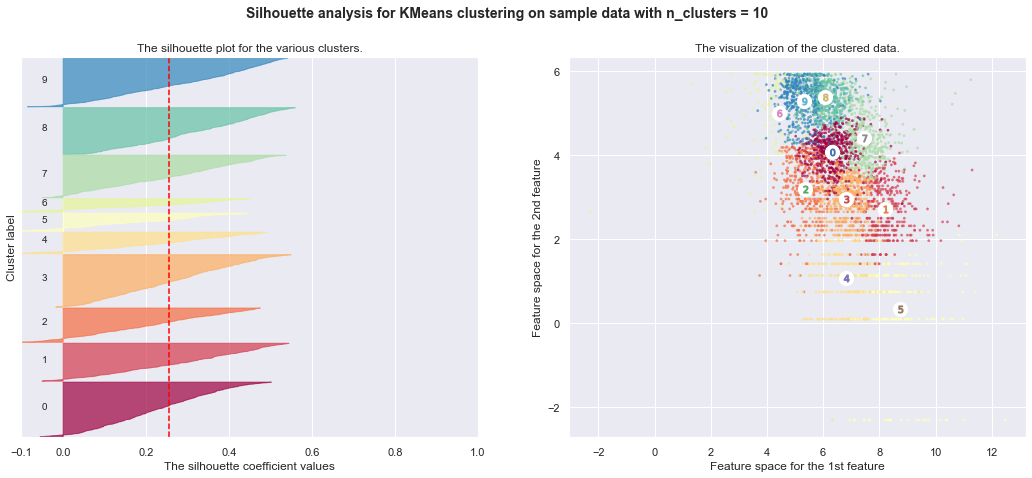

For n_clusters = 11 The average silhouette_score is : 0.26487149609607286


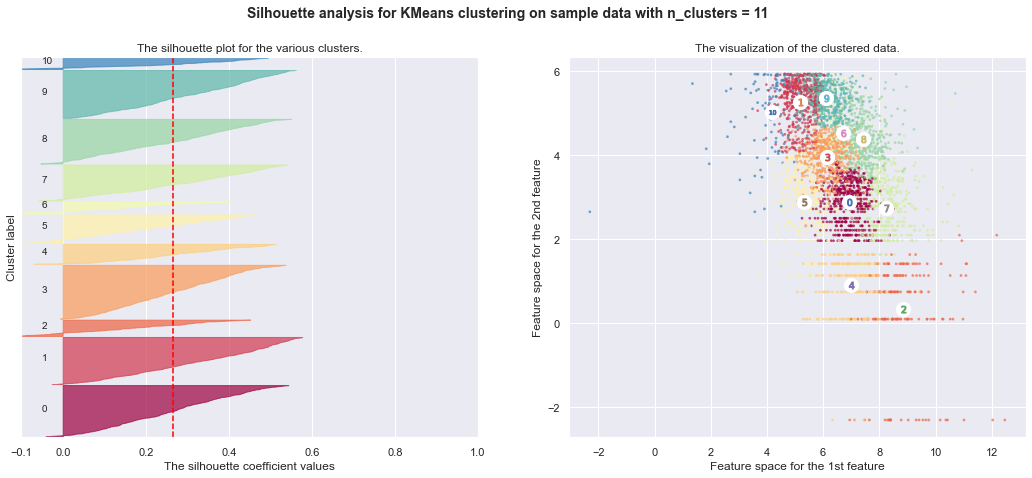

For n_clusters = 12 The average silhouette_score is : 0.269269318670772


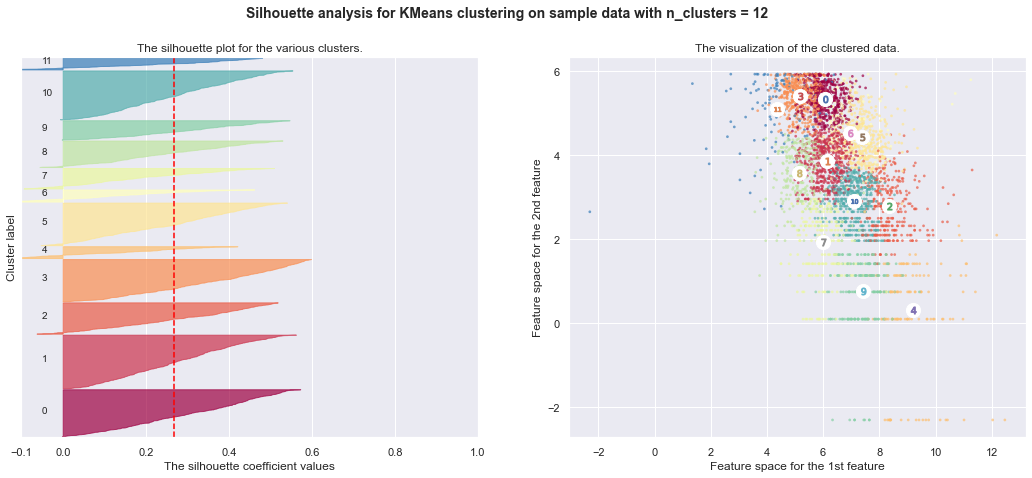

For n_clusters = 13 The average silhouette_score is : 0.27107156537242877


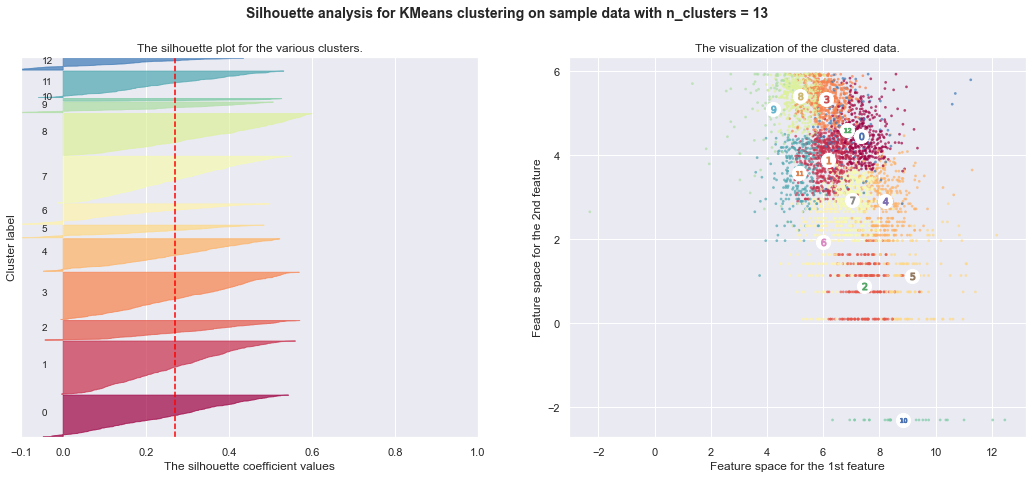

For n_clusters = 14 The average silhouette_score is : 0.26456799574044976


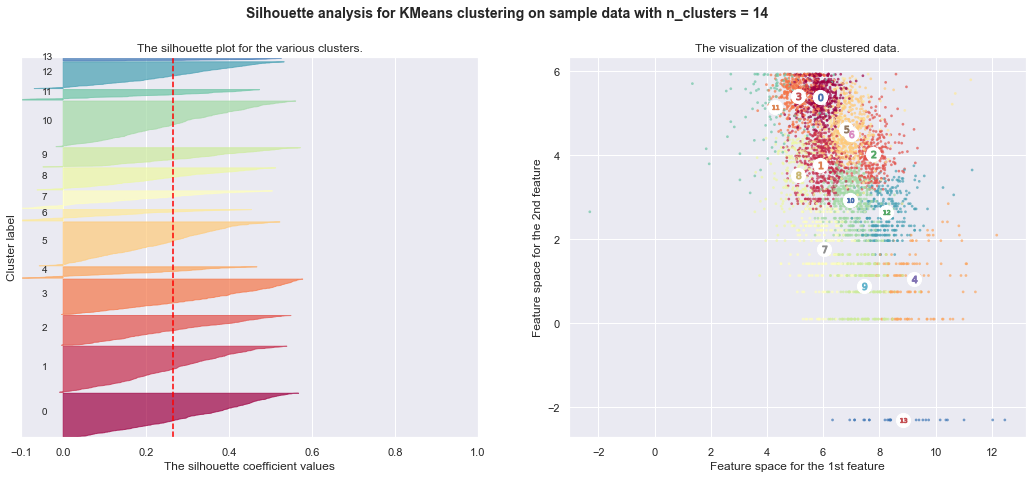

For n_clusters = 15 The average silhouette_score is : 0.2664169804343669


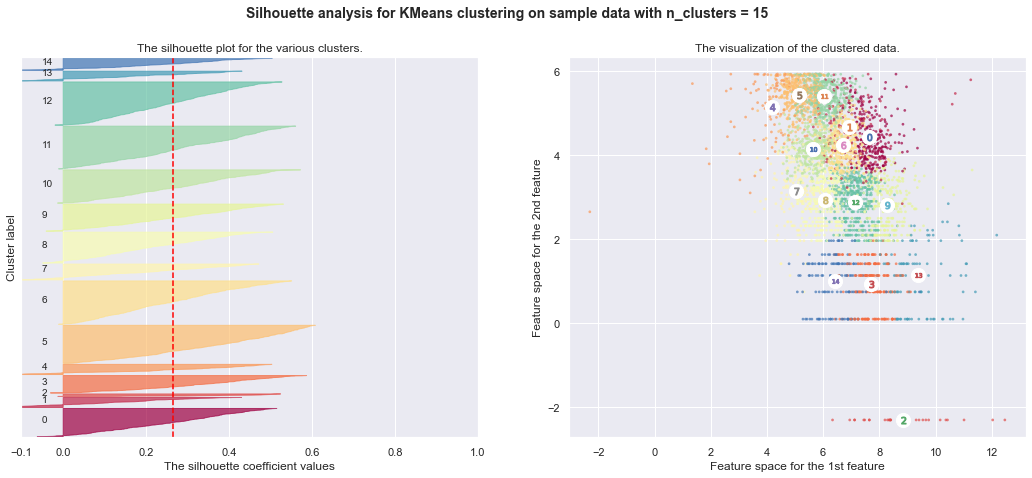

For n_clusters = 16 The average silhouette_score is : 0.26037244855242


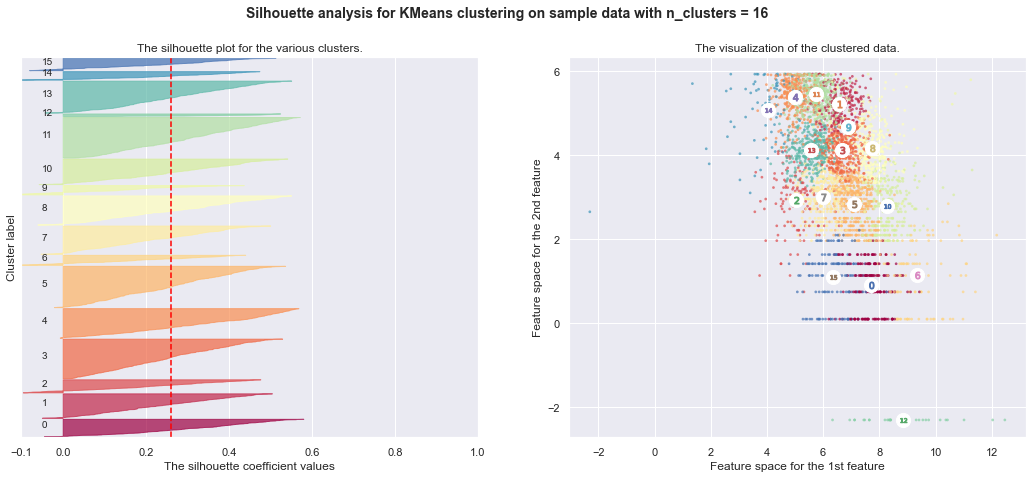

In [100]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [101]:
from sklearn.cluster import AgglomerativeClustering 

In [102]:
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

In [103]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

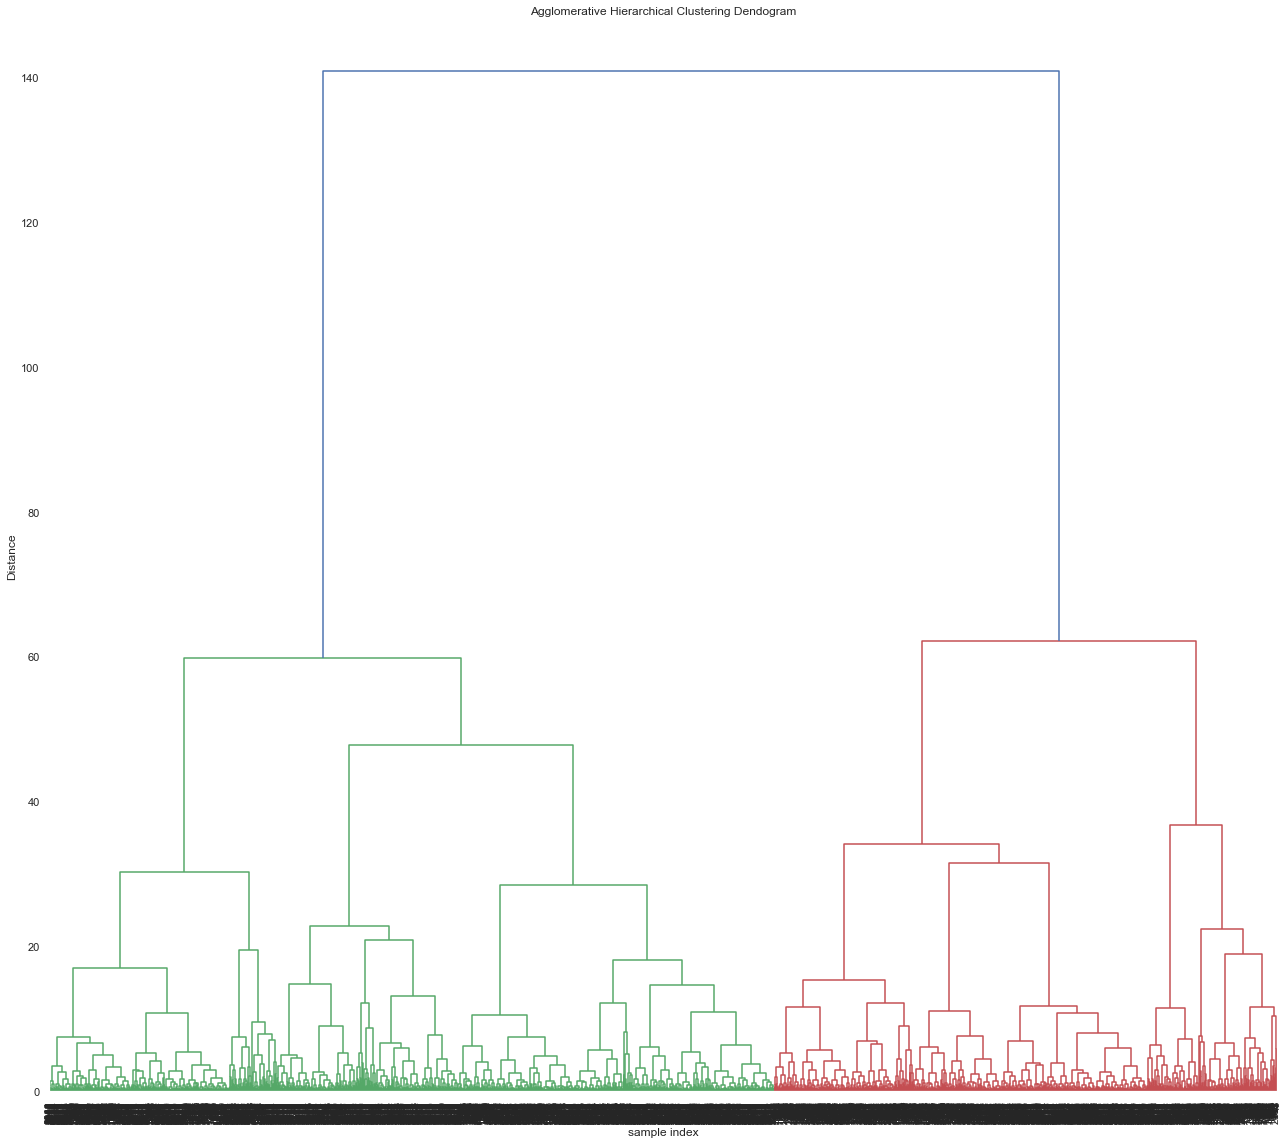

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [106]:
prediction_agg = model2.labels_

In [107]:
X_df['group_agg'] = prediction_agg

In [108]:
X_df.head()

,Monetary,Recency,Frequency,group,group_agg
CustomerID,,,,,
17850.0,8.592544,5.919163,5.693732,1,0
13047.0,8.082600,3.437208,5.147494,1,0
13748.0,6.854724,4.554929,3.332205,0,1
15100.0,6.775480,5.808443,1.098612,0,1
15291.0,8.448572,3.222868,4.634729,1,0


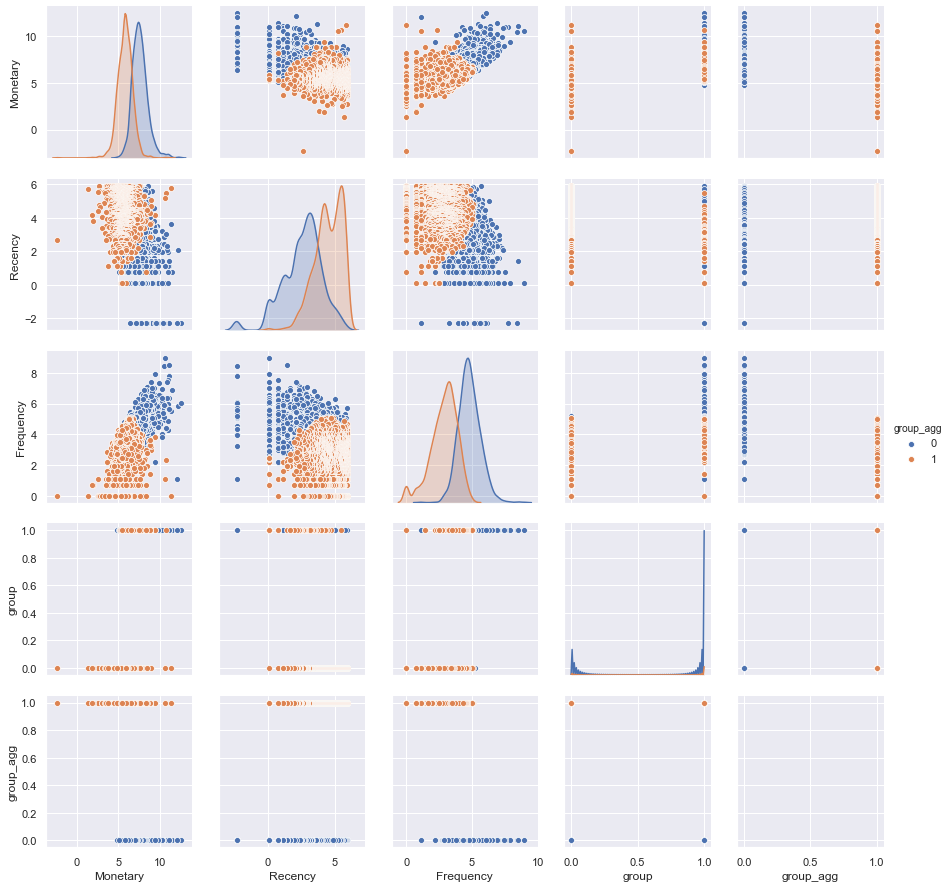

In [109]:
sns.pairplot(X_df,diag_kind='kde',hue='group_agg')

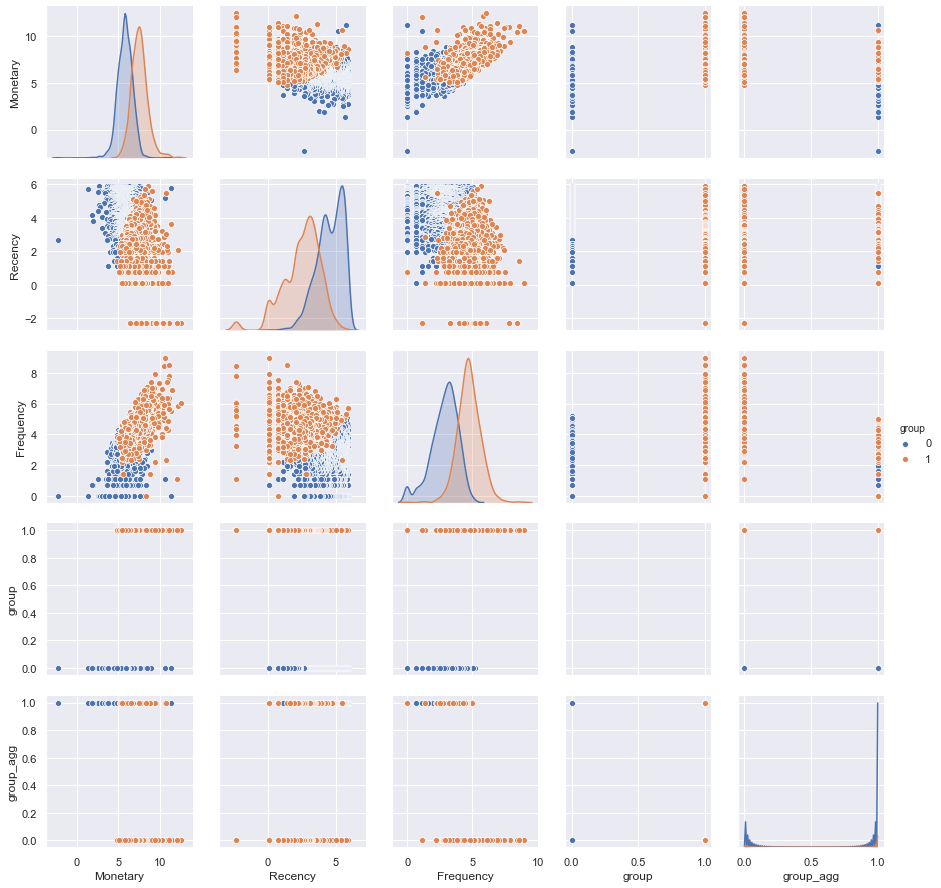

In [110]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

Cluster formed from K-Means and Agglomerative are almost of the same nature.

The **best silhouette score** obtained is when the **number of clusters is 2**.

**Conclusion - Perspective after applying k-means clustering**:

We obtained separated clusters(not absolutely but still having good results). Clusters assignments are muddled.

Limitations of k-means clustering:
- There is no assurance that it will lead to the ***global*** best solution.
- Can't deal with **different shapes**(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of k-means mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope. Here comes Guassian Mixture Model (GMM) in help by providing greater flexibility due to clusters having unconstrained covariances and allowing probabilistic cluster assignment.

Reference  ***Python Data Science Handbook*** by ***Jake VanderPlas***.



### Conclusion - Perspectives

At this juncture, it makes sense to show interested stakeholders the cluster solutions and get their input. The decision should be based upon how the business plans to use the results, and the **level of granularity** they want to see in the clusters. What range of customer behavior from high-to-low value customers are the business stakeholders interested in exploring? And from the answer to that question various methods of clustering can be further exploited whether applied on RFM variables or directly on the transaction dataset available.